In [1]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx.algorithms.community as nxcom
%matplotlib inline

In [2]:
#traformo i file degli streamer in un unico file con gli archi
#leggo da file grafo.txt


grafo = nx.read_edgelist('graph.txt',
                                  delimiter=' ', 
                                  create_using=nx.DiGraph(),
                                  nodetype=str)

Rimozione dei singoletti

In [3]:
grafo.remove_edges_from(nx.selfloop_edges(grafo))

Informazioni sulla rete

In [4]:
print("The network has {} nodes".format(grafo.order()))
print("The network has {} edges".format(grafo.size()))

The network has 37637 nodes
The network has 138225 edges


In [14]:
nx.is_directed_acyclic_graph(grafo)

False

In [12]:
# gradi, in degree e out degree
degrees = list(dict(grafo.degree()).values())

print('Mean degree: \t'+ str(np.mean(degrees)))
print('Standard deviation: ' + str(np.std(degrees)))
print('Median: ' + str(np.median(degrees)))
print('iqr: ' + str(np.quantile(degrees, 0.75) - np.quantile(degrees, 0.25)))
print('Min: ' + str(np.min(degrees)))
print('Max: ' + str(np.max(degrees)))

Mean degree: 	7.345165661450169
Standard deviation: 43.11626399357824
Median: 1.0
iqr: 1.0
Min: 1
Max: 2063


In [13]:
random_graph_erdos = nx.fast_gnp_random_graph(len(grafo.nodes), nx.density(grafo))
random_degrees = list(dict(random_graph_erdos.degree()).values())

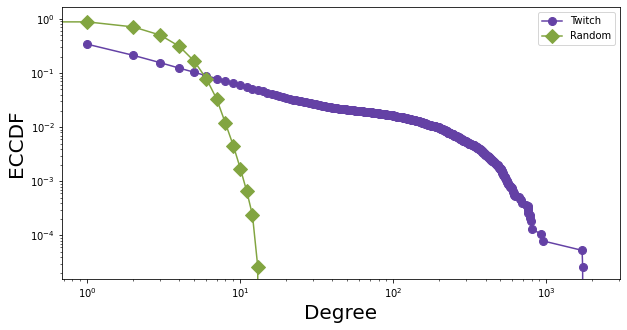

In [17]:
cdf = ECDF(degrees)
x = np.unique(degrees)
y = cdf(x)

cdf_random = ECDF(random_degrees)
x_random = np.unique(random_degrees)
y_random = cdf_random(x_random)
 
fig_cdf_fb = plt.figure(figsize=(10,5))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='-', label = "Twitch", color = "#6441a5")
axes.loglog(x_random,1-y_random,marker='D',ms=10, linestyle='-', label="Random", color = "#82A541")
axes.legend()
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
plt.savefig("Images/DegreeDistribution.png", dpi=1200, bbox_inches='tight')
plt.show()



### In-Degree

In [19]:


in_degrees_noitems =  dict(grafo.in_degree(weight='weight'))
in_degrees = list(in_degrees_noitems.values())


print('Mean degree: \t'+ str(np.mean(in_degrees)))
print('Standard deviation: ' + str(np.std(in_degrees)))
print('Median: ' + str(np.median(in_degrees)))
print('iqr: ' + str(np.quantile(in_degrees, 0.75) - np.quantile(in_degrees, 0.25)))
print('Min: ' + str(np.min(in_degrees)))
print('Max: ' + str(np.max(in_degrees)))



Mean degree: 	3.6725828307250845
Standard deviation: 13.138644024172619
Median: 1.0
iqr: 1.0
Min: 0
Max: 570


Verifico se il nodo con più followers in Italia sia anche quello più seguito dagli altri streamers.

In [26]:
sorted_degree = {k: v for k, v in sorted(in_degrees_noitems.items(), key=lambda item: item[1], reverse=True)}

first5pairs = {k: sorted_degree[k] for k in list(sorted_degree)[:5]}
first5pairs

{'pow3rtv': 570,
 'ilmasseo': 424,
 'homyatol': 408,
 'matteohs': 404,
 'zanoxvii': 372}

In [30]:
erdos_directed = nx.fast_gnp_random_graph(len(grafo.nodes), nx.density(grafo), directed=True)
in_degrees_random = list(dict(erdos_directed.in_degree(weight="weight")).values())

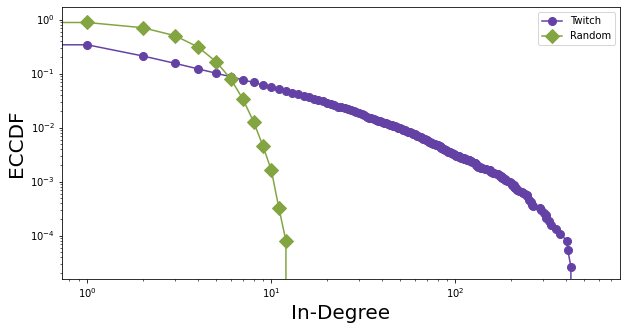

In [31]:
cdf = ECDF(in_degrees)
x = np.unique(in_degrees)
y = cdf(x)

cdf_random = ECDF(in_degrees_random)
x_random = np.unique(in_degrees_random)
y_random = cdf_random(x_random)
 
fig_cdf_fb = plt.figure(figsize=(10,5))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='-', label = "Twitch", color = "#6441a5")
axes.loglog(x_random,1-y_random,marker='D',ms=10, linestyle='-', label="Random", color = "#82A541")
axes.legend()
axes.set_xlabel('In-Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
plt.savefig("Images/InDegreeDistribution.png", dpi=1200, bbox_inches='tight')
plt.show()

### Out-Degree

In [29]:
out_degrees_dict = dict(grafo.out_degree(weight="weight"))
out_degrees = list(out_degrees_dict.values())

print('Mean degree: \t'+ str(np.mean(out_degrees)))
print('Standard deviation: ' + str(np.std(out_degrees)))
print('Median: ' + str(np.median(out_degrees)))
print('iqr: ' + str(np.quantile(out_degrees, 0.75) - np.quantile(out_degrees, 0.25)))
print('Min: ' + str(np.min(out_degrees)))
print('Max: ' + str(np.max(out_degrees)))



Mean degree: 	3.6725828307250845
Standard deviation: 35.212096055811585
Median: 0.0
iqr: 0.0
Min: 0
Max: 1997


In [34]:
# random
out_degrees_random =  list(dict(erdos_directed.out_degree(weight="weight")).values())

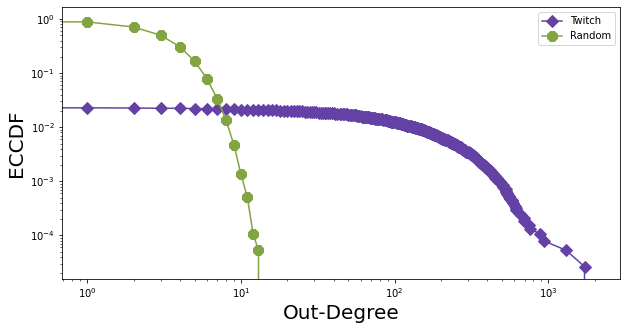

In [36]:
cdf = ECDF(out_degrees)
x = np.unique(out_degrees)
y = cdf(x)

cdf_random = ECDF(out_degrees_random)
x_random = np.unique(out_degrees_random)
y_random = cdf_random(x_random)
 
fig_cdf_fb = plt.figure(figsize=(10,5))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='D',ms=8, linestyle='-', label = "Twitch", color = "#6441a5")
axes.loglog(x_random,1-y_random,marker='8',ms=10, linestyle='-', label="Random", color = "#82A541")
axes.legend()
axes.set_xlabel('Out-Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
plt.savefig("Images/OutDegreeDistribution.png", dpi=1200, bbox_inches='tight')
plt.show()

Text(0, 0.5, 'ECCDF')

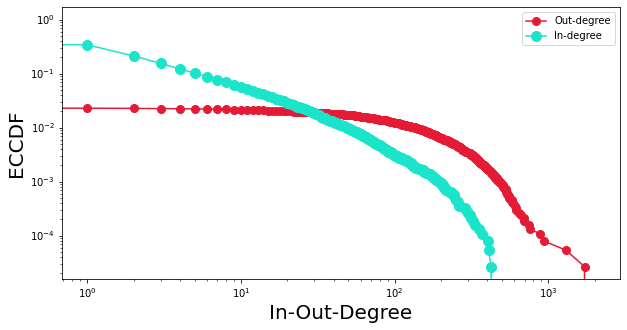

In [39]:
cdf_out = ECDF(out_degrees)
x_out = np.unique(out_degrees)
y_out = cdf_out(x_out)

cdf_in = ECDF(in_degrees)
x_in = np.unique(in_degrees)
y_in = cdf_in(x_in)
 
fig_cdf_fb = plt.figure(figsize=(10,5))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x_out,1-y_out,marker='o',ms=8, linestyle='-', label = "Out-degree", color = "#E51A34")
axes.loglog(x_in,1-y_in,marker='o',ms=10, linestyle='-', label="In-degree", color = "#1AE5CB")
axes.legend()
axes.set_xlabel('In-Out-Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)

### Connectivity

In [43]:
# T or F if strongly connected or weakly connected
print(nx.is_strongly_connected(grafo))
print(nx.is_weakly_connected(grafo))

False
True


In [47]:
strong_component, weak_component =  nx.strongly_connected_components(grafo), nx.weakly_connected_components(grafo)

list_strong = list(strong_component)
list_weak = list(weak_component)

In [49]:
print("Number of strong connected components: " + str(len(list_strong)))

Number of strong connected components: 36802


In [50]:
print("Number of weak connected components: " + str(len(list_weak)))

Number of weak connected components: 1


In [60]:
len_cc = [len(wcc) for wcc in list_weak]
counts = pd.Series(len_cc).value_counts().sort_index()

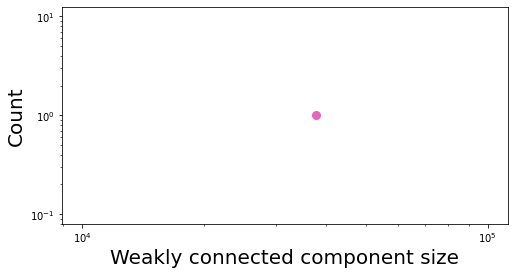

In [61]:
fig_gc = plt.figure(figsize=(8,4))
axes = fig_gc.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(counts.index,counts.values,marker='o',ms=8, linestyle='None', color = "#EA63BD")
axes.set_xlabel('Weakly connected component size',size=20)
axes.set_ylabel('Count', size = 20)
plt.savefig("Images/ConnectedComponents.png", dpi=1200, bbox_inches='tight')
plt.show()

### Small World

In [73]:

#Gcc = sorted(nx.connected_components(weak_component), key=len, reverse=True)
#G0 = G.subgraph(Gcc[0])
sorted_components = sorted(list_weak, key = lambda x : len(x), reverse=True)
giant_component = grafo.subgraph(sorted_components[0]).to_undirected()
diameter = nx.diameter(giant_component)
diameter

#diametro di 7

7

### Reciprocity

In [74]:
reciprocity = nx.reciprocity(grafo)  #Compute the reciprocity in a directed graph.

overall_reciprocity = nx.overall_reciprocity(grafo)  #Compute the reciprocity for the whole graph.

print(reciprocity, overall_reciprocity)


# reciprocity 0.12566467715680954

0.12566467715680954 0.12566467715680954


### Transitivity

In [76]:
transitivity = print(nx.transitivity(grafo))

print(transitivity)


0.029878927753333447
None


#### Clustering

In [79]:
#clustering = nx.clustering(grafo)
average_clustering = nx.average_clustering(grafo)
average_clustering_non_zeros = nx.average_clustering(grafo, count_zeros=False)

#print(clustering)
print(average_clustering) #0.14555088970367833
print(average_clustering_non_zeros) #0.5249735348133533

0.14555088970367833
0.5249735348133533


### Centrality

In [6]:
#vedo centralità dei primi 10
primi_dieci = ['pow3rtv', 'ilmasseo', 'zanoxvii', 'therealmarzaa', 'matteohs', 'homyatol', 'tumblurr', 'xiuder_', 'justgabbo', 'lyonwgflive']
degree_centrality = nx.degree_centrality(grafo)
in_degree_centrality = nx.in_degree_centrality(grafo)
out_degree_centrality = nx.out_degree_centrality(grafo)

eigenvector_centrality = nx.eigenvector_centrality(grafo)
#katz_centrality = nx.katz_centrality(grafo)
closeness_centrality = nx.closeness_centrality(grafo)
betweenness_centrality = nx.betweenness_centrality(grafo)


    


In [7]:
degree_top10 = {}
in_degree_top10 = {}
out_degree_top10 = {}
eigenvector_top10 = {}
closeness_top10 = {}
betwenness_top10 = {}
#sorted = dict(sorted(prova.items(), key=lambda item: item[1]))
#list(sorted.keys())[-1]
primi_dieci = ['pow3rtv', 'ilmasseo', 'zanoxvii', 'therealmarzaa', 'matteohs', 'homyatol', 'tumblurr', 'xiuder_', 'justgabbo', 'lyonwgflive']

for i in range(10):
    degree_top10[primi_dieci[i]] = degree_centrality[primi_dieci[i]]
    in_degree_top10[primi_dieci[i]]= in_degree_centrality[primi_dieci[i]]
    out_degree_top10[primi_dieci[i]] = out_degree_centrality[primi_dieci[i]]
    eigenvector_top10[primi_dieci[i]] = eigenvector_centrality[primi_dieci[i]]
    closeness_top10[primi_dieci[i]] = closeness_centrality[primi_dieci[i]]
    betwenness_top10[primi_dieci[i]] = betweenness_centrality[primi_dieci[i]]

In [8]:
degree_top10 = dict(sorted(degree_top10.items(), key=lambda item: item[1], reverse=True))
in_degree_top10 = dict(sorted(in_degree_top10.items(), key=lambda item: item[1], reverse=True))
out_degree_top10 = dict(sorted(out_degree_top10.items(), key=lambda item: item[1], reverse=True))
eigenvector_top10 = dict(sorted(eigenvector_top10.items(), key=lambda item: item[1], reverse=True))
closeness_top10 = dict(sorted(closeness_top10.items(), key=lambda item: item[1], reverse=True))
betwenness_top10 = dict(sorted(betwenness_top10.items(), key=lambda item: item[1], reverse=True))

print(degree_top10)
df = pd.DataFrame.from_dict(degree_top10, orient='index' )



{'matteohs': 0.04546179190137103, 'pow3rtv': 0.01966202572005527, 'ilmasseo': 0.014985652035285365, 'homyatol': 0.014188542884472315, 'justgabbo': 0.01349771495376767, 'zanoxvii': 0.013418004038686366, 'therealmarzaa': 0.009831012860027634, 'tumblurr': 0.009512169199702413, 'xiuder_': 0.006589435646721225, 'lyonwgflive': 0.00294930385800829}


In [9]:
array_degree_top10 = []
array_in_degree_top10 = []
array_out_degree_top10= []
array_eigenvector_top10= []
array_closeness_top10= []
array_betwenness_top10= []

In [10]:
for i in degree_top10:
    
    array_degree_top10.append(i)
for i in in_degree_top10:
    array_in_degree_top10.append(i)
for i in out_degree_top10:
    array_out_degree_top10.append(i)
for i in eigenvector_top10:
    array_eigenvector_top10.append(i)
for i in closeness_top10:
    array_closeness_top10.append(i)
for i in betwenness_top10:
    array_betwenness_top10.append(i)

In [11]:
array_degree_top10
d = {'col1': [1, 2], 'col2': [3, 4]}

In [12]:
d = {'Degree' :array_degree_top10, 'In-Degree': array_in_degree_top10, 'Out-degree':array_out_degree_top10, 'Eigenvector' :array_eigenvector_top10, 'Closeness':array_closeness_top10, 'Betwenness':array_betwenness_top10}
table = pd.DataFrame(data = d)
table

,Degree,In-Degree,Out-degree,Eigenvector,Closeness,Betwenness
0,matteohs,pow3rtv,matteohs,pow3rtv,pow3rtv,matteohs
1,pow3rtv,ilmasseo,justgabbo,ilmasseo,ilmasseo,pow3rtv
2,ilmasseo,homyatol,pow3rtv,homyatol,homyatol,justgabbo
3,homyatol,matteohs,ilmasseo,matteohs,matteohs,zanoxvii
4,justgabbo,zanoxvii,zanoxvii,zanoxvii,zanoxvii,ilmasseo
5,zanoxvii,justgabbo,homyatol,justgabbo,justgabbo,homyatol
6,therealmarzaa,therealmarzaa,therealmarzaa,therealmarzaa,therealmarzaa,tumblurr
7,tumblurr,tumblurr,tumblurr,tumblurr,tumblurr,therealmarzaa
8,xiuder_,xiuder_,lyonwgflive,xiuder_,xiuder_,xiuder_
9,lyonwgflive,lyonwgflive,xiuder_,lyonwgflive,lyonwgflive,lyonwgflive


### Community detection 

In [5]:
!pip install python-louvain

In [26]:
import community

In [27]:
grafo_non_diretto = grafo.to_undirected()
louvain_partition = community.best_partition(grafo_non_diretto)

In [29]:
louvain_partition

{'pow3rtv': 0,
 'zerefttv': 1,
 'skannella': 2,
 'huskerrs': 0,
 'paponetv': 3,
 'federic': 4,
 'nickisshark': 0,
 'koil': 5,
 'tumblurr': 0,
 'xqcow': 0,
 'venzoffthewall': 4,
 'flaliz': 6,
 'its_iron': 0,
 'recrent': 0,
 'mutex': 3,
 'yakinop': 7,
 'jezuzjrr': 3,
 'giankoextreme': 0,
 'jeckvii': 0,
 'cuurve_tv': 3,
 'lvndmark': 9,
 'loeya': 7,
 'j0hnnycreek': 0,
 'gskianto': 5,
 'manuelito': 1,
 'panetty': 0,
 'luceluna': 10,
 'mangaka96': 4,
 'reverse2k': 7,
 'p1botv': 3,
 'dariomocciatwitch': 4,
 'misshatredtv': 0,
 'giadacristinabessi': 5,
 'zedef': 0,
 '000skillz': 4,
 'winghaven': 3,
 'summit1g': 5,
 'slimdogsproduction': 4,
 'nickmercs': 7,
 'symfuhny': 7,
 'gabryspaccatutto': 0,
 'berritv': 5,
 'odouglascosta': 11,
 's7ormytv': 0,
 'matteohs': 9,
 'rovazzi': 4,
 'charlesleclerc': 0,
 'homyatol': 4,
 'parliamodivg': 4,
 'mox600': 1,
 'sloppyr6': 2,
 'cantact': 4,
 'lucyl3in': 0,
 'itslomba': 3,
 'kilnier': 9,
 'cohhcarnage': 12,
 'ghostfreak66': 2,
 'pestily': 5,
 'the_hypah': 

In [22]:
grafo_non_diretto.order()

37637

In [23]:
for n, com in louvain_partition.items():
    grafo_non_diretto.nodes[n]['community'] = com

In [26]:
grafo_non_diretto.values()

AttributeError: 'Graph' object has no attribute 'values'

In [24]:
nx.write_gexf(grafo_non_diretto, 'gnd.gexf')

In [18]:
from collections import Counter

In [19]:
Counter(louvain_partition.values())

Counter({0: 4076,
         10: 1661,
         2: 1976,
         3: 279,
         4: 4836,
         6: 6230,
         7: 3292,
         8: 1381,
         9: 359,
         14: 3897,
         17: 2788,
         15: 669,
         1: 2483,
         11: 669,
         5: 605,
         12: 639,
         13: 178,
         16: 1619})

In [6]:
grafo_non_diretto = grafo.to_undirected()
greedy = sorted(nxcom.greedy_modularity_communities(grafo_non_diretto), key=len, reverse=True)
print(type(greedy))

<class 'list'>


In [7]:
greedy = list(greedy)

In [9]:
i = 0;
greedy_dict = {}
for com in greedy:
    for streamer in com:
        greedy_dict[streamer] = i
    
    i = i +1

In [11]:
for n, com in greedy_dict.items():
    grafo_non_diretto.nodes[n]['community'] = com

In [12]:
nx.write_gexf(grafo_non_diretto, 'greedy.gexf')

In [30]:
modularity = nx.algorithms.community.modularity(grafo, greedy, weight='weight')
modularity

KeyboardInterrupt: 

### Clustering

In [7]:
print(sorted(list(nx.clustering(grafo).values())))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Correlazione tra followers e views

In [7]:
from twitchAPI.twitch import Twitch
from twitchAPI.types import SortMethod
from twitchAPI.types import TimePeriod
# create instance of twitch API
twitch = Twitch('rdvwrtcn9q3bau5an3ztb4enri6esw', 'g8fwyibbylnfe4707ozwl0jrqrxnqw')
twitch.authenticate_app([])

In [74]:
# apri file channels1.txt e leggi top 100 streamer
# per ogni streamer cerca id
# per ogni id cerca il video con più views
# crea due array: n followers - n views 
with open("channels1.txt") as myfile:
    streamers_100 = [next(myfile) for x in range(800)]

In [75]:
num_followers = []
num_views = []

for streamer in streamers_100:
    streamer = streamer.rstrip("\n")
 
    streamer_info = twitch.get_users(logins=[streamer])
    if ( len(streamer_info['data']) == 0) :
        print("ciao")
        continue
    streamer_id = streamer_info['data'][0]['id']
    
    video_views = twitch.get_videos(user_id=streamer_id, first=1, sort=SortMethod.VIEWS)
    if ( len(video_views['data']) == 0) :
        print("ciao")
        continue
    views = video_views['data'][0]['view_count']
    num_views.append(views)
    
    streamer_info = twitch.get_users_follows(to_id=streamer_id)
    streamer_info['total']
    num_followers.append(streamer_info['total'])


ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao
ciao


463993

{'data': [], 'pagination': {}}


IndexError: list index out of range

In [76]:
print(len(num_views))
print(len(num_followers))

677
677


In [77]:
import scipy.stats 
scipy.stats.pearsonr(num_views, num_followers)

(0.6018499996951493, 6.055608188185766e-68)

In [79]:
top100_views = num_views[:100]
top100_followers = num_followers[:100]

In [81]:
scipy.stats.pearsonr(top100_views, top100_followers)

(0.5220541746613039, 2.5422365990362018e-08)

In [86]:
top100_views = num_views[:10]
top100_followers = num_followers[:10]

In [87]:
scipy.stats.pearsonr(top100_views, top100_followers)

(0.3005529655921584, 0.3987804387401042)

In [ ]:
streamer_info = twitch.get_users(logins=['panetty'])

streamer_id = streamer_info['data'][0]['id']
video_views = twitch.get_videos(user_id=streamer_id, first=1, sort=SortMethod.VIEWS)
print(video_views)
if ( len(video_views['data']) == 0) :
    print("ciao")
views = video_views['data'][0]['view_count']
views